In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import tensorflow as tf 
import keras 
from keras import layers
import os
print("Current working directory:", os.getcwd())

2025-09-22 14:42:21.501662: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-22 14:42:21.544948: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Current working directory: /home/lukas/Desktop/Uni/DL/Tasks/Task_1


2025-09-22 14:42:22.613782: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
#df = pd.read_csv("datasets/car_price_prediction.csv")
df = pd.read_csv("../datasets/Task_1/6.csv")
df.head()
df.describe()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
count,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,1.728000e+04,17280.00000,17280.000000,17280.000000,17280.000000
mean,15948.988484,673.025637,8.010069,143.770833,2011.063252,2.636169,2.251852,2.376690,1.434509e+06,4.56684,1.430787,1.895023,6.492593
std,17481.567959,556.026199,6.891074,261.889546,5.632832,1.685629,1.138073,6.179017,4.554488e+07,1.17088,0.875132,0.538445,4.327532
min,20.000000,0.000000,1.000000,1.000000,1939.000000,1.000000,1.000000,0.000000,0.000000e+00,1.00000,1.000000,1.000000,0.000000
25%,4547.000000,0.000000,5.000000,8.000000,2010.000000,1.000000,2.000000,1.800000,7.099400e+04,4.00000,1.000000,2.000000,4.000000
50%,12388.000000,751.000000,6.000000,40.000000,2012.000000,3.000000,2.000000,2.000000,1.260000e+05,4.00000,1.000000,2.000000,4.000000
75%,21104.500000,1017.000000,8.000000,150.250000,2015.000000,3.000000,3.000000,2.500000,1.881940e+05,4.00000,1.000000,2.000000,12.000000
max,872946.000000,7536.000000,65.000000,1590.000000,2020.000000,11.000000,7.000000,571.000000,2.147484e+09,16.00000,4.000000,3.000000,16.000000


In [3]:
# perform X/y -split
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df.drop(["Price"], axis=1)

# have only the target variable here (dependent variable)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [4]:
variable_amount = len(X.columns)

model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(variable_amount,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)
model.compile(optimizer='adam', loss='mse')
model.summary()

/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-22 14:42:22.815476: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117 (4.36 KB)

 Trainable params: 1,117 (4.36 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
print("X_train dtypes:", X_train.dtypes)
print("y_train dtype:", y_train.dtype)
model.fit(X_train, y_train, epochs=300)

X_train dtypes: Levy               int64
Manufacturer       int64
Model              int64
Prod. year         int64
Category           int64
Fuel type          int64
Engine volume    float64
Mileage            int64
Cylinders        float64
Gear box type      int64
Drive wheels       int64
Airbags            int64
dtype: object
y_train dtype: int64
Epoch 1/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 1088376864768.0000
Epoch 2/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 4088287985664.0000
Epoch 3/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 1321565028352.0000
Epoch 4/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 1970810912768.0000
Epoch 5/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 11647381504.0000
Epoch 6/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 1091819392.0000
Epoch 7/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 267938256.0000
Epoch 8/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 261304032.0000
Epoch 

<Axes: >

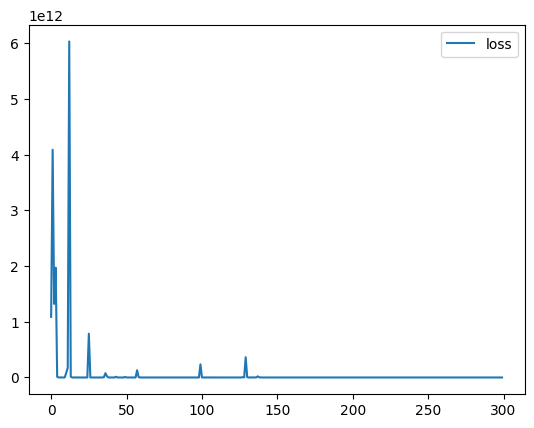

In [6]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [7]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
369851520.0

Train data evaluation:
226304144.0


In [8]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


,Test True Y,Model Predictions
0,11604,11210.786133
1,9879,22358.794922
2,19707,14804.751953
3,16621,16830.703125
4,19707,10012.808594
...,...,...
5179,11290,17713.267578
5180,80,17155.966797
5181,10976,12617.937500
5182,9396,11717.398438


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

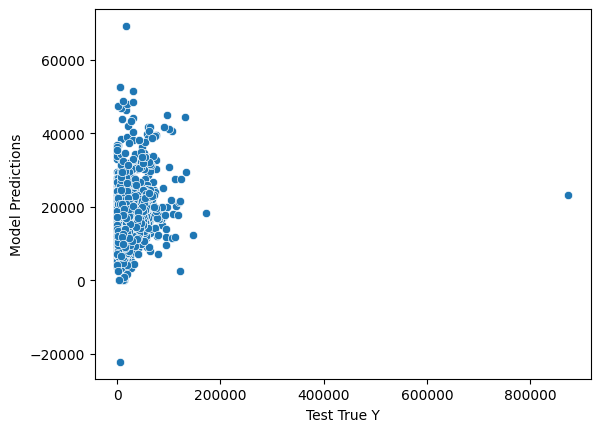

In [9]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [10]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
10673.61 $

MSE
369851488.0 $^2

RMSE:
19231.52 $

R-squared:
0.08

Explained variance score:
0.08


/tmp/ipykernel_362442/3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


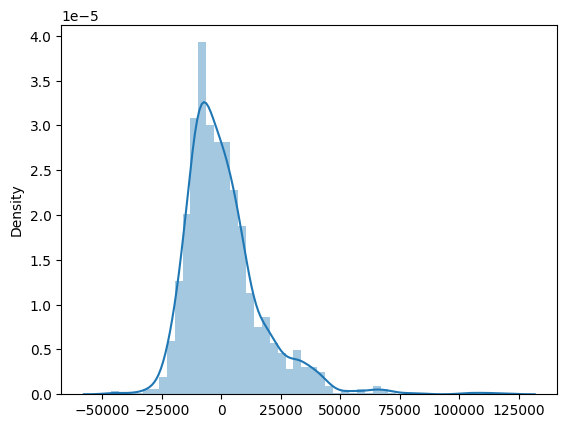

In [11]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()